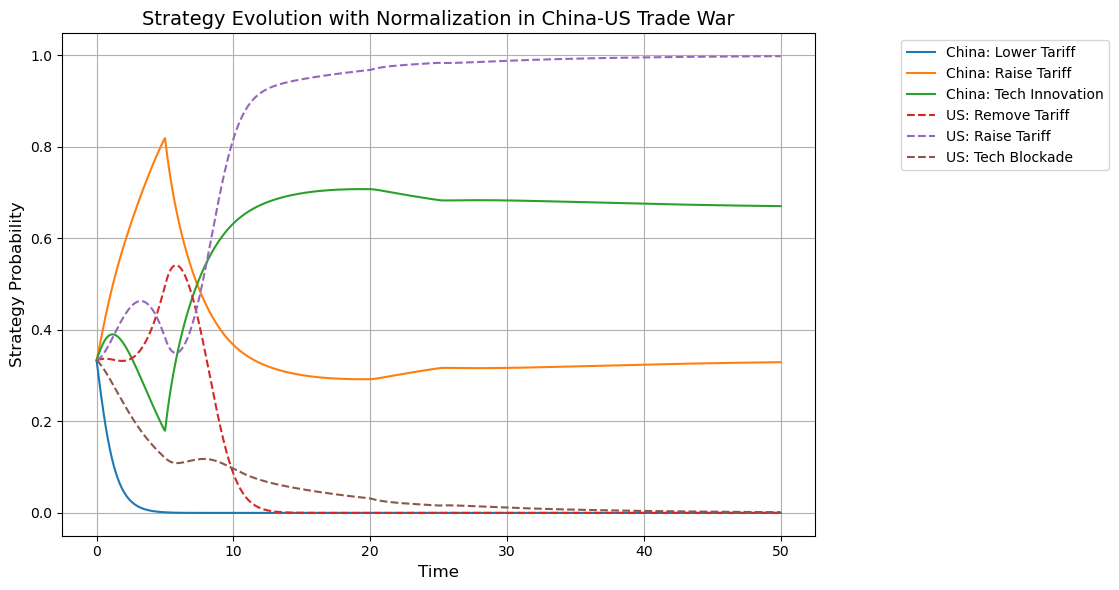

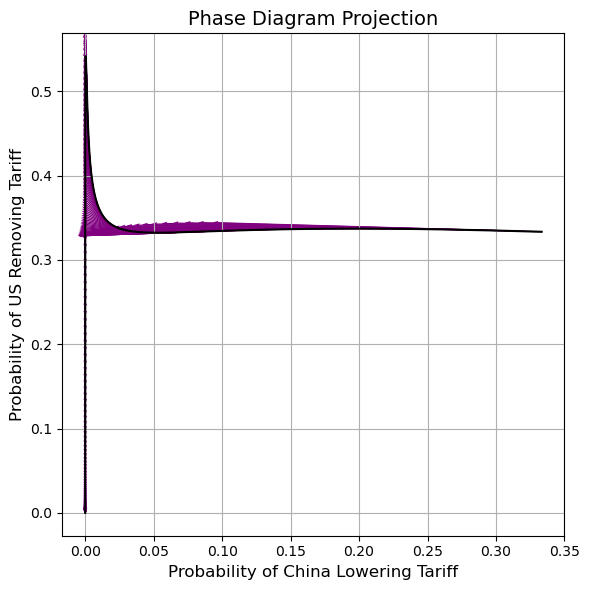

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- Parameters and Strategies ---
num_strategies_C, num_strategies_U = 3, 3

payoff_C = np.array([[2.5, 1.0, 1.5],
                     [4.0, 2.0, 2.5],
                     [3.5, 1.5, 3.0]])

payoff_U = np.array([[2.0, 3.5, 1.0],
                     [1.0, 2.5, 3.0],
                     [0.5, 1.0, 2.0]])

mu_C, mu_U = 0.4, 0.3

def policy_C(t): 
    return np.array([0.0, 0.0, 1.0]) if 5 < t < 50 else np.zeros(3)

def policy_U(t): 
    # 初始强度
    initial_tech_blockade = 1  
    decay_rate = 0.1  
    
    # 技术封锁随时间指数衰减
    tech_blockade_strength = initial_tech_blockade * np.exp(-decay_rate * t)
    
    # 20 < t < 25 时美国提高关税，强度0.6 
    tariff_increase = 0.6 if 20 < t < 25 else 0.0
    
    return np.array([0.0, tariff_increase, tech_blockade_strength])

def replicator_dynamics(X, t):
    x = X[:num_strategies_C]
    y = X[num_strategies_C:]
    fitness_C = payoff_C @ y
    avg_fitness_C = x @ fitness_C
    fitness_U = payoff_U @ x
    avg_fitness_U = y @ fitness_U
    dx_dt = x * (fitness_C - avg_fitness_C) + mu_C * policy_C(t)
    dy_dt = y * (fitness_U - avg_fitness_U) + mu_U * policy_U(t)
    return np.concatenate([dx_dt, dy_dt])

initial_state = np.array([1/3]*num_strategies_C + [1/3]*num_strategies_U)
time = np.linspace(0, 50, 1000)

solution = odeint(replicator_dynamics, initial_state, time)

# --- Normalization ---
for i in range(len(time)):
    x_sum = np.sum(solution[i, :num_strategies_C])
    y_sum = np.sum(solution[i, num_strategies_C:])
    if x_sum > 0:
        solution[i, :num_strategies_C] /= x_sum
    if y_sum > 0:
        solution[i, num_strategies_C:] /= y_sum

x = solution[:, :num_strategies_C]
y = solution[:, num_strategies_C:]

# --- Visualization 1: Strategy Evolution ---
plt.figure(figsize=(12, 6))
strategy_labels_C = ["China: Lower Tariff", "China: Raise Tariff", "China: Tech Innovation"]
strategy_labels_U = ["US: Remove Tariff", "US: Raise Tariff", "US: Tech Blockade"]

for i in range(num_strategies_C):
    plt.plot(time, x[:, i], label=strategy_labels_C[i], linestyle='-')
for j in range(num_strategies_U):
    plt.plot(time, y[:, j], label=strategy_labels_U[j], linestyle='--')

plt.title("Strategy Evolution with Normalization in China-US Trade War", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Strategy Probability", fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("1.png", dpi=1200)
plt.show()

# --- Visualization 2: Phase Diagram Projection ---
plt.figure(figsize=(6, 6))
plt.quiver(x[:-1,0], y[:-1,0], x[1:,0]-x[:-1,0], y[1:,0]-y[:-1,0], 
           scale_units='xy', angles='xy', scale=0.05, color='purple')
plt.plot(x[:,0], y[:,0], color='black')
plt.xlabel("Probability of China Lowering Tariff", fontsize=12)
plt.ylabel("Probability of US Removing Tariff", fontsize=12)
plt.title("Phase Diagram Projection", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("2.png", dpi=1200)
plt.show()


<>:717: SyntaxWarning: invalid escape sequence '\m'
<>:718: SyntaxWarning: invalid escape sequence '\m'
<>:721: SyntaxWarning: invalid escape sequence '\m'
<>:717: SyntaxWarning: invalid escape sequence '\m'
<>:718: SyntaxWarning: invalid escape sequence '\m'
<>:721: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21832\2958971639.py:717: SyntaxWarning: invalid escape sequence '\m'
  ax4.plot(time, dynamic_mu_C_values, label="China's Policy Intensity ($\mu_C$)", color='darkblue', linewidth=2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21832\2958971639.py:718: SyntaxWarning: invalid escape sequence '\m'
  ax4.plot(time, dynamic_mu_U_values, label="US's Policy Intensity ($\mu_U$)", color='darkred', linewidth=2, linestyle='--')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21832\2958971639.py:721: SyntaxWarning: invalid escape sequence '\m'
  ax4.set_ylabel("Intensity ($\mu$)", fontsize=12)


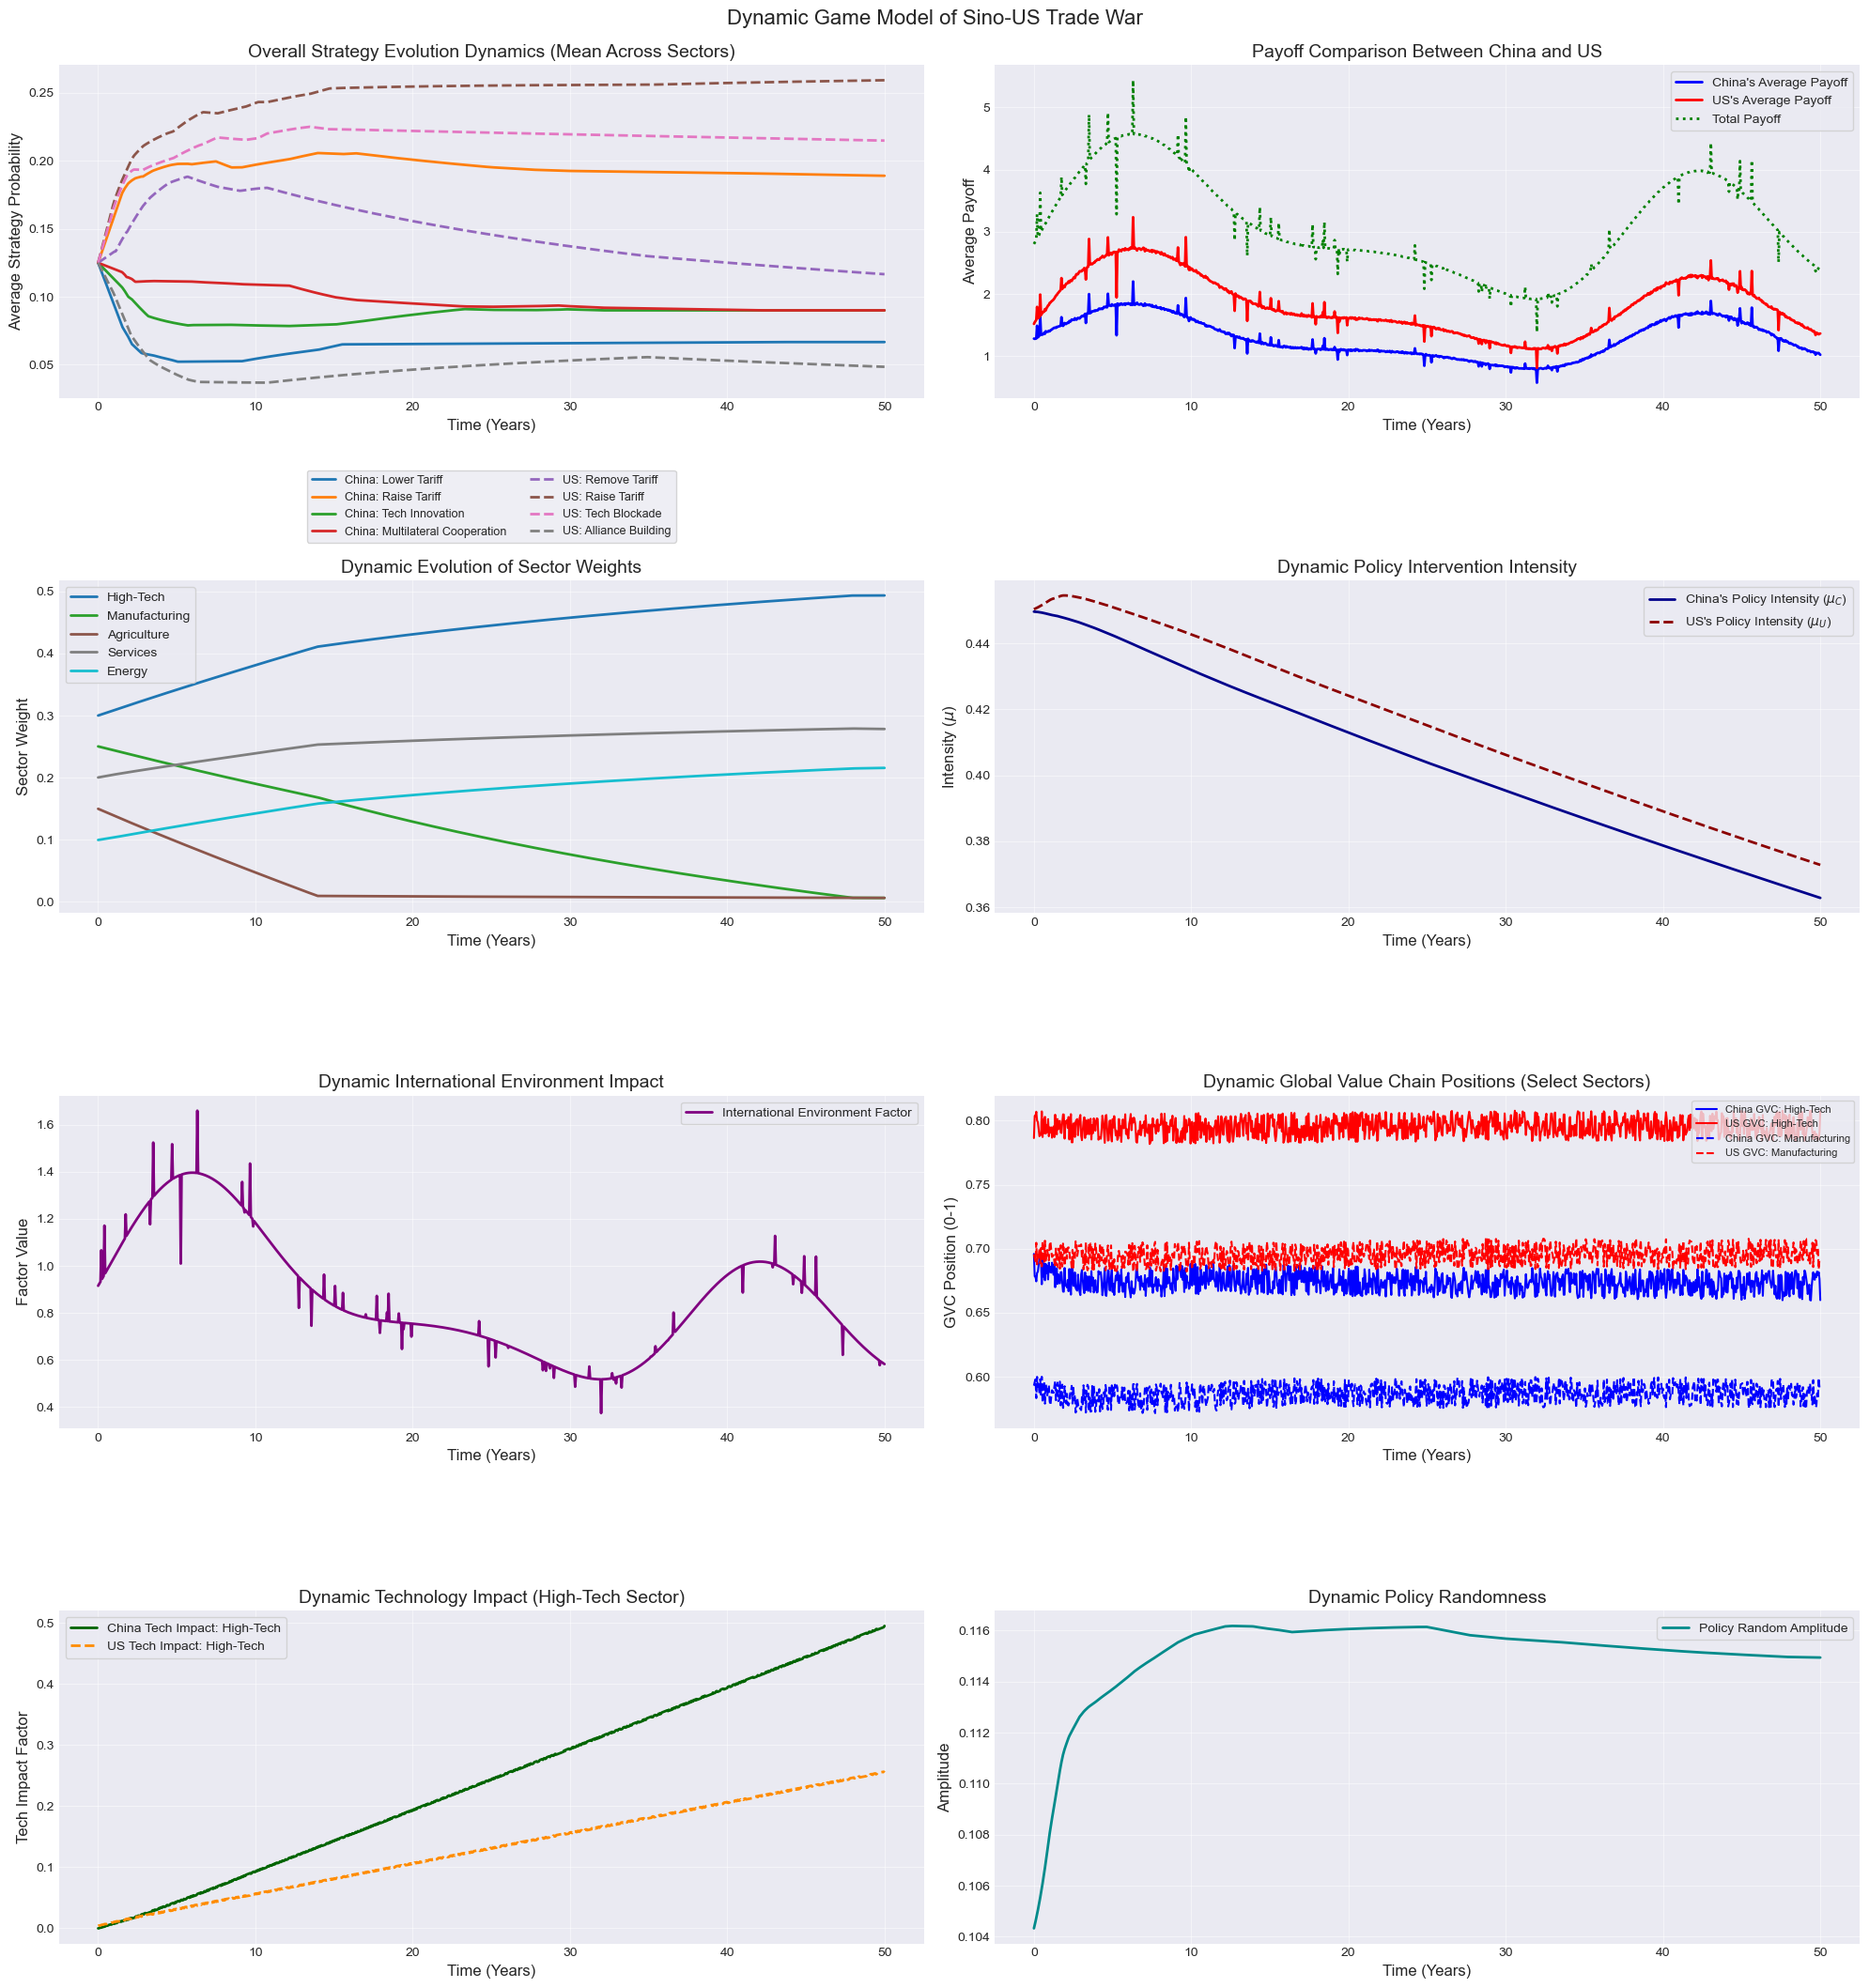

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# --- Model Parameters Setup ---
np.random.seed(42)  # Set random seed for reproducibility

# Game Theory Specifics
NUM_STRATEGIES_C = 8  # Number of strategies for China
NUM_STRATEGIES_U = 8  # Number of strategies for the US
NUM_SECTORS = 5       # Industry classification: High-Tech, Manufacturing, Agriculture, Services, Energy

# Strategy Labels (unchanged, as they are descriptive and useful)
STRATEGY_LABELS_C = [
    "China: Lower Tariff", "China: Raise Tariff", "China: Tech Innovation",
    "China: Industrial Subsidy", "China: Market Opening", "China: Multilateral Cooperation",
    "China: Currency Manipulation", "China: Resource Control"
]

STRATEGY_LABELS_U = [
    "US: Remove Tariff", "US: Raise Tariff", "US: Tech Blockade",
    "US: Investment Restriction", "US: Industrial Reshoring", "US: Alliance Building",
    "US: Currency Sanctions", "US: Energy Dominance"
]

SECTOR_LABELS = ["High-Tech", "Manufacturing", "Agriculture", "Services", "Energy"]

# Base Payoff Matrix - Represents initial interaction effects between strategies per sector
# These are still base values, but will be dynamically adjusted
BASE_PAYOFF_C = np.random.uniform(0.5, 4.0, size=(NUM_STRATEGIES_C, NUM_STRATEGIES_U, NUM_SECTORS))
BASE_PAYOFF_U = np.random.uniform(0.5, 4.0, size=(NUM_STRATEGIES_U, NUM_STRATEGIES_C, NUM_SECTORS))

# --- Initial Values for Dynamic Parameters & Sensitivity Settings ---
# These are the *initial* values or sensitivities. Their actual values will change over time.

# Policy Intervention Intensity (mu) initial base values and sensitivities
MU_C_INITIAL_BASE = 0.4
MU_U_INITIAL_BASE = 0.35
MU_DECAY_RATE_SENSITIVITY = 0.005 # How much policy effectiveness decays with 'war fatigue'
MU_CYCLE_AMPLITUDE_SENSITIVITY = 0.05 # How much external factors influence policy cycles (not directly used yet but kept for potential future use)
MU_PAYOFF_BOOST_SENSITIVITY = 0.01 # How much higher payoff can boost intervention
MU_VOLATILITY_FACTOR = 0.05 # How much uncertainty impacts policy intensity

# Sector Weights initial values and dynamic sensitivities
SECTOR_BASE_WEIGHTS = np.array([0.3, 0.25, 0.15, 0.2, 0.1])
SECTOR_TREND_RATES_BASE = np.array([0.01, -0.005, -0.01, 0.005, 0.005])
SECTOR_ADAPTABILITY_FACTOR = 0.01 # How quickly sector weights adjust to payoff changes
SECTOR_DIVERSITY_FACTOR = 0.005 # Encourages diversification if one sector is too dominant/weak
SECTOR_MIN_WEIGHT = 0.01

# Policy Fluctuation parameters (dynamic, affected by instability)
INITIAL_POLICY_RANDOM_AMPLITUDE = 0.1
POLICY_VOLATILITY_SENSITIVITY = 0.02 # How much volatility in payoffs increases policy noise

# International Environment parameters (dynamic, influenced by global stability)
INT_ENV_ECONOMIC_CYCLE_AMPLITUDE_BASE = 0.3
INT_ENV_THIRD_PARTY_IMPACT_SENSITIVITY = 0.1 # How much cooperation impacts third party effects
INT_ENV_GOVERNANCE_DECAY_RATE_BASE = 0.03
INT_ENV_GLOBAL_STABILITY_FACTOR = 0.02 # How much overall economic health affects governance strength (not directly used yet)
INT_ENV_SHOCK_PROBABILITY_BASE = 0.05
INT_ENV_SHOCK_AMPLITUDE_BASE = 0.1
INT_ENV_SHOCK_RISK_FROM_AGGRESSION = 0.01 # Aggressive strategies increase shock probability

# Technology Progress parameters (dynamic, influenced by investment and competition)
TECH_BASE_INNOVATION_SENSITIVITY = 0.01 # How much 'Tech Innovation' strategy translates to base tech gain
TECH_BLOCKADE_COUNTER_SENSITIVITY = 0.02 # How effective 'Tech Innovation' is against 'Tech Blockade'
TECH_ALLIANCE_BOOST_SENSITIVITY = 0.01 # How much 'Alliance Building' boosts US tech
TECH_INVESTMENT_FACTOR = 0.005 # How much general industrial policy boosts tech in other sectors
TECH_DIFFUSION_CONSTRAINT = 0.005 # Max diffusion rate if cooperation is low (this looks like a scaling factor)
TECH_INTER_SECTOR_DIFFUSION = 0.001 # Small diffusion of tech knowledge between sectors

# Global Value Chain Restructuring parameters (dynamic, influenced by trade policies)
GVC_CHINA_INITIAL_POS = np.array([0.7, 0.6, 0.5, 0.6, 0.5]) # Initial GVC position for China per sector
GVC_US_INITIAL_POS = np.array([0.8, 0.7, 0.6, 0.7, 0.6])   # Initial GVC position for US per sector
GVC_POLICY_IMPACT_SENSITIVITY = 0.05 # How much tariff/blockade strategies affect GVC positions
GVC_COOPERATION_STRENGTHENS_CHAIN = 0.03 # How much multilateral cooperation stabilizes GVC
GVC_RECONSTRUCTION_SPEED_BASE = 0.02
GVC_SPEED_FROM_DISRUPTION = 0.01 # How much aggressive strategies accelerate GVC restructuring
GVC_MIN_POSITION = 0.2
GVC_MAX_POSITION = 0.9

# Replicator Dynamics parameters (dynamic, influenced by conflict intensity)
INTER_SECTOR_INFLUENCE_BASE = 0.01
INTER_SECTOR_INFLUENCE_DIVERSIFICATION_BOOST = 0.005 # Increases with diverse strategies
RANDOM_STRATEGY_SHOCK_BASE = 0.02
RANDOM_STRATEGY_SHOCK_ESCALATION = 0.01 # Increases with conflict


# --- Helper Functions for Dynamic Parameters ---

def get_dynamic_mu(t, country_avg_payoff, opponent_avg_payoff, current_strategies):
    """
    Calculates dynamic policy intervention intensity (mu) based on time, payoffs, and strategies.
    - Decays over time (war fatigue).
    - Boosts when own payoff is high, reduces when opponent's is high (response to success/failure).
    - Fluctuates with overall global stability.
    - Increases with strategy volatility (more need for intervention when things are uncertain).
    """
    # Determine which country this mu is for
    if current_strategies.shape[0] == NUM_STRATEGIES_C: # This is China's mu
        base_mu = MU_C_INITIAL_BASE
    else: # This is US's mu
        base_mu = MU_U_INITIAL_BASE
    
    # Time decay (war fatigue)
    decay_factor = np.exp(-MU_DECAY_RATE_SENSITIVITY * t)
    # Adding a floor to prevent mu from decaying to near zero too fast
    decay_term = base_mu * decay_factor + 0.05 # Add a minimum base

    # Payoff influence: Higher own payoff encourages more intervention, lower opponent payoff might too (counter)
    # Using relative payoff difference
    payoff_influence = MU_PAYOFF_BOOST_SENSITIVITY * (country_avg_payoff - opponent_avg_payoff)
    
    # Volatility influence: More drastic strategy changes might lead to more intervention
    # (Approximation: Use standard deviation of current strategy distribution across sectors)
    # Ensure current_strategies has a mean along the correct axis to get std dev per strategy across sectors
    strategy_volatility = np.mean(np.std(current_strategies, axis=1)) # Mean std dev across strategies for a country

    volatility_boost = MU_VOLATILITY_FACTOR * strategy_volatility

    dynamic_mu = decay_term + payoff_influence + volatility_boost
    return np.clip(dynamic_mu, 0.05, 1.0) # Constrain mu to a reasonable range

def get_dynamic_sector_weights(t, x, y, sector_payoffs_C, sector_payoffs_U):
    """
    Calculates dynamic sector weights.
    - Adapts based on sector performance (higher payoff -> higher weight).
    - Influenced by long-term trends.
    - Includes a factor for diversification or consolidation.
    """
    weights = np.copy(SECTOR_BASE_WEIGHTS)

    # Long-term trends
    weights += SECTOR_TREND_RATES_BASE * t

    # Adaptation based on current sector performance (relative to overall average)
    avg_total_payoff_per_sector = (sector_payoffs_C + sector_payoffs_U) / 2
    global_avg_payoff = np.mean(avg_total_payoff_per_sector)
    
    # Avoid division by zero and ensure positive global average payoff for relative calculation
    if global_avg_payoff > 1e-9: # Small positive number to prevent near-zero division
        performance_adapt = SECTOR_ADAPTABILITY_FACTOR * (avg_total_payoff_per_sector - global_avg_payoff) / global_avg_payoff
        weights += performance_adapt
    
    # Diversification/Consolidation: Penalize overly dominant or weak sectors
    # This part can be tricky to make stable. A simpler approach might be to just apply a small force
    # towards the mean if weights become too extreme, rather than directly penalizing max/min.
    # For now, let's keep the original logic but ensure clips.
    
    # Ensure weights are positive before normalization
    weights = np.maximum(weights, SECTOR_MIN_WEIGHT)
    
    # Re-normalize to sum to 1 after all adjustments
    weights /= np.sum(weights)
    
    # A small diversification nudge if one sector becomes too dominant
    if np.max(weights) > 0.5: # If any sector is more than 50%
        dominant_sector_idx = np.argmax(weights)
        weights[dominant_sector_idx] -= SECTOR_DIVERSITY_FACTOR
        remaining_sum = 1.0 - weights[dominant_sector_idx]
        weights_to_redistribute = weights - weights[dominant_sector_idx] # Distribute from other sectors
        weights_to_redistribute[dominant_sector_idx] = 0 # Don't redistribute to dominant
        weights_to_redistribute = np.maximum(weights_to_redistribute, 0) # Ensure non-negative
        weights[weights != weights[dominant_sector_idx]] += SECTOR_DIVERSITY_FACTOR * (weights_to_redistribute / np.sum(weights_to_redistribute))
        weights /= np.sum(weights) # Re-normalize again

    return weights

def get_dynamic_policy_random_amplitude(t, x, y, avg_payoff_C, avg_payoff_U):
    """
    Policy noise/randomness increases with perceived instability or lower payoffs.
    """
    # Instability proxy: large payoff difference or low total payoff
    payoff_difference = np.abs(avg_payoff_C - avg_payoff_U)
    total_payoff = avg_payoff_C + avg_payoff_U
    
    # Inverse relationship with total payoff (lower total payoff, higher amplitude)
    # Add a small value to total_payoff to prevent division by zero if payoffs are negative or zero
    instability_from_total_payoff = 1.0 / (1.0 + np.maximum(total_payoff, 0.1)) # Scale 0 to 1

    # Higher difference means more unpredictable policy
    dynamic_amplitude = INITIAL_POLICY_RANDOM_AMPLITUDE + \
                        POLICY_VOLATILITY_SENSITIVITY * (payoff_difference + instability_from_total_payoff)
    
    return np.clip(dynamic_amplitude, 0.05, 0.5) # Constrain range

def get_dynamic_international_environment(t, x, y, avg_payoff_C, avg_payoff_U):
    """
    Simulates the impact of the international environment.
    - Global economic cycle amplitude can be constrained by overall economic health.
    - Third-party impact can be mitigated by multilateral cooperation.
    - Global governance decay rate can slow down with more stable payoffs.
    - Shock probability increases with aggressive strategies.
    """
    # Global economic cycle (amplitude can reduce if trade relations are very good)
    overall_trade_health = (avg_payoff_C + avg_payoff_U) / 2 # Proxy for global economic health
    # Scale overall_trade_health to fit a reasonable range for amplitude modulation
    # Assuming average payoff is typically around 2-3, scale so that it affects amplitude meaningfully
    amplitude_mod_factor = np.clip(overall_trade_health / 3.0, 0.5, 1.5) # If avg payoff is 3, factor is 1
    economic_cycle_amplitude = INT_ENV_ECONOMIC_CYCLE_AMPLITUDE_BASE * amplitude_mod_factor

    economic_cycle = 1.0 + economic_cycle_amplitude * np.sin(t/5)

    # Third-party country alliance impact (mitigated by multilateral cooperation)
    china_multilateral_coop = np.mean(x[STRATEGY_LABELS_C.index("China: Multilateral Cooperation"), :])
    us_alliance_building = np.mean(y[STRATEGY_LABELS_U.index("US: Alliance Building"), :])
    
    # High cooperation reduces negative third-party impact
    cooperation_mitigation = INT_ENV_THIRD_PARTY_IMPACT_SENSITIVITY * (china_multilateral_coop + us_alliance_building) / 2
    
    # Base third party impact with a random component
    base_third_party_impact = (0.2 * np.sin(t/3) + 0.15 * np.sin((t+2)/7) + 0.1 * np.sin((t+4)/11))
    third_party_impact = base_third_party_impact * (1 - np.clip(cooperation_mitigation, 0, 1)) # Mitigation can't exceed 100%

    # Global governance system changes (decay slows down with higher global stability/payoffs)
    global_stability_factor = np.clip((avg_payoff_C + avg_payoff_U) / 10, 0.5, 1.0) # Higher payoffs -> more stability
    governance_decay_rate = INT_ENV_GOVERNANCE_DECAY_RATE_BASE * (2 - global_stability_factor) # Slower decay if more stable
    global_governance = 0.1 * np.exp(-governance_decay_rate * t) + 0.75 # Ensure a floor for governance strength

    # Sudden international events (risk increases with aggressive strategies)
    china_aggression_indices = [STRATEGY_LABELS_C.index("China: Raise Tariff"), STRATEGY_LABELS_C.index("China: Currency Manipulation")]
    us_aggression_indices = [STRATEGY_LABELS_U.index("US: Raise Tariff"), STRATEGY_LABELS_U.index("US: Tech Blockade")]
    
    china_aggression_level = np.mean(x[china_aggression_indices, :])
    us_aggression_level = np.mean(y[us_aggression_indices, :])
    
    current_shock_probability = INT_ENV_SHOCK_PROBABILITY_BASE + INT_ENV_SHOCK_RISK_FROM_AGGRESSION * (china_aggression_level + us_aggression_level)
    current_shock_probability = np.clip(current_shock_probability, 0.01, 0.2) # Constrain

    random_shock = 0.0
    if np.random.random() < current_shock_probability:
        random_shock = INT_ENV_SHOCK_AMPLITUDE_BASE * np.random.normal() # Can be positive or negative shock
    
    return economic_cycle * (1 + third_party_impact) * global_governance * (1 + random_shock)

def get_dynamic_technology_impact(x, y, t, sector_payoffs_C, sector_payoffs_U):
    """
    Simulates Sino-US technological progress and diffusion.
    - Base innovation depends on specific tech strategies and investment.
    - Blockade counter-effectiveness depends on opponent's tech strategy.
    - Global diffusion can be constrained by overall lack of cooperation.
    """
    # China's technological progress - mainly from innovation and combating blockades
    # China: Tech Innovation (idx 2), Industrial Subsidy (idx 3)
    # High-Tech sector is index 0
    china_tech_strategy_hightech = x[STRATEGY_LABELS_C.index("China: Tech Innovation"), SECTOR_LABELS.index("High-Tech")]
    china_industrial_subsidy_avg = np.mean(x[STRATEGY_LABELS_C.index("China: Industrial Subsidy"), :]) # General investment

    # US: Tech Blockade (idx 2)
    us_tech_blockade_strategy_hightech = y[STRATEGY_LABELS_U.index("US: Tech Blockade"), SECTOR_LABELS.index("High-Tech")]

    # China's tech base in high-tech
    china_tech_base_hightech = TECH_BASE_INNOVATION_SENSITIVITY * china_tech_strategy_hightech - \
                               TECH_BLOCKADE_COUNTER_SENSITIVITY * us_tech_blockade_strategy_hightech + 0.01 * t

    # US technological progress - mainly from self-R&D (Tech Blockade implies strong R&D) and Alliance Building
    # US: Tech Blockade (idx 2), Alliance Building (idx 5), Investment Restriction (idx 3)
    us_tech_strategy_hightech = y[STRATEGY_LABELS_U.index("US: Tech Blockade"), SECTOR_LABELS.index("High-Tech")]
    us_alliance_building_avg = np.mean(y[STRATEGY_LABELS_U.index("US: Alliance Building"), :])
    us_investment_restriction_avg = np.mean(y[STRATEGY_LABELS_U.index("US: Investment Restriction"), :]) # Can indirectly boost local R&D

    us_tech_base_hightech = TECH_BASE_INNOVATION_SENSITIVITY * us_tech_strategy_hightech + \
                            TECH_ALLIANCE_BOOST_SENSITIVITY * us_alliance_building_avg + \
                            TECH_INVESTMENT_FACTOR * us_investment_restriction_avg + 0.005 * t

    # Technology spillover and diffusion (globalization impact)
    # Reduced by aggressive strategies, boosted by cooperative ones
    global_cooperation_level = (china_tech_strategy_hightech + china_industrial_subsidy_avg + \
                               us_tech_strategy_hightech + us_alliance_building_avg) / 4.0 # Average cooperation indicator
    
    # Ensures that higher cooperation leads to higher diffusion, within bounds
    global_tech_diffusion = (0.02 * np.sin(t/8) + 0.03) * np.clip(global_cooperation_level / TECH_DIFFUSION_CONSTRAINT, 0.1, 2.0)

    # Tech race effect (competition can accelerate or hinder progress)
    tech_race_effect = 0.01 * (china_tech_strategy_hightech * us_tech_strategy_hightech) * (1 if np.random.random() > 0.5 else -1)

    china_tech_impact = np.zeros(NUM_SECTORS)
    us_tech_impact = np.zeros(NUM_SECTORS)

    # High-Tech sector is directly influenced by core tech strategies
    china_tech_impact[SECTOR_LABELS.index("High-Tech")] = china_tech_base_hightech
    us_tech_impact[SECTOR_LABELS.index("High-Tech")] = us_tech_base_hightech

    for i in range(NUM_SECTORS): # Iterate over all sectors
        if i != SECTOR_LABELS.index("High-Tech"):
            # Technology progress in other sectors is a fraction of high-tech progress,
            # also influenced by industrial policies and overall sector health (payoffs)
            # and global tech diffusion
            china_tech_impact[i] = china_tech_base_hightech * 0.5 * (1 + TECH_INVESTMENT_FACTOR * china_industrial_subsidy_avg + 0.1 * sector_payoffs_C[i]) + global_tech_diffusion
            us_tech_impact[i] = us_tech_base_hightech * 0.5 * (1 + TECH_INVESTMENT_FACTOR * us_investment_restriction_avg + 0.1 * sector_payoffs_U[i]) + global_tech_diffusion

    # Add inter-sector technology diffusion (a strategy in one sector can slightly boost another)
    for i in range(NUM_SECTORS):
        for j in range(NUM_SECTORS):
            if i != j:
                # Tech innovation in one sector (j) can diffuse to another (i)
                china_tech_impact[i] += TECH_INTER_SECTOR_DIFFUSION * x[STRATEGY_LABELS_C.index("China: Tech Innovation"), j]
                us_tech_impact[i] += TECH_INTER_SECTOR_DIFFUSION * y[STRATEGY_LABELS_U.index("US: Tech Blockade"), j] # US enforcing local R&D/tech strength

    # Apply tech race effect globally or predominantly to high-tech
    china_tech_impact[SECTOR_LABELS.index("High-Tech")] += tech_race_effect
    us_tech_impact[SECTOR_LABELS.index("High-Tech")] -= tech_race_effect # Zero sum in tech race for high-tech

    # Ensure tech impacts remain positive
    china_tech_impact = np.maximum(china_tech_impact, -0.5) # Allow some negative impact but not too much
    us_tech_impact = np.maximum(us_tech_impact, -0.5)

    return china_tech_impact, us_tech_impact, global_tech_diffusion + tech_race_effect

def get_dynamic_global_value_chain_impact(x, y, t):
    """
    Simulates dynamic global value chain restructuring.
    - Policy impact varies with intensity of trade policies.
    - Cooperation strengthens GVCs, aggressive policies disrupt.
    - Reconstruction speed changes with trade war intensity.
    """
    china_position = np.copy(GVC_CHINA_INITIAL_POS) # Initial base
    us_position = np.copy(GVC_US_INITIAL_POS)       # Initial base

    # Influence of specific policies on GVC positions
    # US Tech Blockade (idx 2) & Investment Restriction (idx 3) impact China, particularly High-Tech
    china_position[SECTOR_LABELS.index("High-Tech")] -= GVC_POLICY_IMPACT_SENSITIVITY * (
        y[STRATEGY_LABELS_U.index("US: Tech Blockade"), SECTOR_LABELS.index("High-Tech")] +
        y[STRATEGY_LABELS_U.index("US: Investment Restriction"), SECTOR_LABELS.index("High-Tech")]
    )
    # General impact of US Investment Restriction across all sectors
    china_position -= GVC_POLICY_IMPACT_SENSITIVITY * np.mean(y[STRATEGY_LABELS_U.index("US: Investment Restriction"), :])


    # US Industrial Reshoring (idx 4) impacts China's manufacturing sector specifically
    china_position[SECTOR_LABELS.index("Manufacturing")] -= GVC_POLICY_IMPACT_SENSITIVITY * \
                                                         y[STRATEGY_LABELS_U.index("US: Industrial Reshoring"), SECTOR_LABELS.index("Manufacturing")]

    # China's Multilateral Cooperation (idx 5) and Market Opening (idx 4) can strengthen its position across sectors
    # Averaging the probability of these strategies across all sectors for a general impact
    china_position += GVC_COOPERATION_STRENGTHENS_CHAIN * np.mean(x[[STRATEGY_LABELS_C.index("China: Multilateral Cooperation"),
                                                                     STRATEGY_LABELS_C.index("China: Market Opening")], :], axis=0)

    # China's Industrial Subsidy (idx 3) impacts US competitiveness across all sectors
    us_position -= GVC_POLICY_IMPACT_SENSITIVITY * np.mean(x[STRATEGY_LABELS_C.index("China: Industrial Subsidy"), :])

    # US Alliance Building (idx 5) strengthens its position across all sectors
    us_position += GVC_COOPERATION_STRENGTHENS_CHAIN * np.mean(y[STRATEGY_LABELS_U.index("US: Alliance Building"), :])

    # Speed of global value chain restructuring: accelerates with aggressive policies (e.g., tariffs, blockades)
    china_aggression_indices = [STRATEGY_LABELS_C.index("China: Raise Tariff"), STRATEGY_LABELS_C.index("China: Currency Manipulation")]
    us_aggression_indices = [STRATEGY_LABELS_U.index("US: Raise Tariff"), STRATEGY_LABELS_U.index("US: Tech Blockade")]
    
    china_aggression_level = np.mean(x[china_aggression_indices, :])
    us_aggression_level = np.mean(y[us_aggression_indices, :])
    
    reconstruction_speed = GVC_RECONSTRUCTION_SPEED_BASE + GVC_SPEED_FROM_DISRUPTION * (china_aggression_level + us_aggression_level)
    reconstruction_speed = np.clip(reconstruction_speed, 0.01, 0.1) # Constrain speed

    # Apply random shifts in GVC positions, proportional to reconstruction speed
    for i in range(NUM_SECTORS):
        shift = reconstruction_speed * (np.random.random() - 0.5) # Random shift between -speed/2 and +speed/2
        china_position[i] += shift
        us_position[i] -= shift # Zero-sum assumption for GVC position shifts between countries

    china_position = np.clip(china_position, GVC_MIN_POSITION, GVC_MAX_POSITION)
    us_position = np.clip(us_position, GVC_MIN_POSITION, GVC_MAX_POSITION)

    return np.array([china_position, us_position])


# --- Enhanced Replicator Dynamics Equation ---
def replicator_dynamics(X, t):
    """
    Enhanced replicator dynamics equation with all dynamic parameters.
    """
    # Reshape state vector
    x = X[:NUM_STRATEGIES_C * NUM_SECTORS].reshape(NUM_STRATEGIES_C, NUM_SECTORS)
    y = X[NUM_STRATEGIES_C * NUM_SECTORS:].reshape(NUM_STRATEGIES_U, NUM_SECTORS)

    # Ensure probabilities sum to 1 within each sector (can drift slightly with ODE solver)
    # Re-normalize if sum deviates significantly, and clip small negative values
    x = np.maximum(x, 1e-12) # Small floor to prevent log(0) or division by zero
    y = np.maximum(y, 1e-12) # Small floor
    
    for j in range(NUM_SECTORS):
        x[:, j] /= np.sum(x[:, j])
        y[:, j] /= np.sum(y[:, j])

    # Calculate average payoffs (needed for some dynamic parameters)
    # First pass: calculate payoffs using current strategy distribution and BASE_PAYOFF
    # This is an approximation for calculating dynamic parameter inputs.
    # The full dynamic payoff calculation (with tech, GVC, int_env) happens in the second pass.
    sector_payoffs_C_temp = np.zeros(NUM_SECTORS)
    sector_payoffs_U_temp = np.zeros(NUM_SECTORS)

    for j in range(NUM_SECTORS):
        sector_payoffs_C_temp[j] = x[:, j] @ BASE_PAYOFF_C[:, :, j] @ y[:, j]
        sector_payoffs_U_temp[j] = y[:, j] @ BASE_PAYOFF_U[:, :, j] @ x[:, j]
    
    # Get dynamic sector weights based on current sector performance
    current_sector_weights = get_dynamic_sector_weights(t, x, y, sector_payoffs_C_temp, sector_payoffs_U_temp)
    
    # Calculate overall average payoffs for the current state (using temp sector payoffs and dynamic weights)
    current_avg_payoff_C = np.sum(sector_payoffs_C_temp * current_sector_weights)
    current_avg_payoff_U = np.sum(sector_payoffs_U_temp * current_sector_weights)

    # --- Dynamically adjust parameters based on current state ---
    mu_c_val = get_dynamic_mu(t, current_avg_payoff_C, current_avg_payoff_U, x)
    mu_u_val = get_dynamic_mu(t, current_avg_payoff_U, current_avg_payoff_C, y)
    
    current_int_env = get_dynamic_international_environment(t, x, y, current_avg_payoff_C, current_avg_payoff_U)
    china_tech_impact, us_tech_impact, global_tech_factor = get_dynamic_technology_impact(x, y, t, sector_payoffs_C_temp, sector_payoffs_U_temp)
    gvc_data = get_dynamic_global_value_chain_impact(x, y, t)
    
    # Pass the calculated dynamic random amplitude to policy functions
    policy_random_amplitude_val = get_dynamic_policy_random_amplitude(t, x, y, current_avg_payoff_C, current_avg_payoff_U)
    policy_c_matrix = get_policy_C(t, current_sector_weights, policy_random_amplitude_val)
    policy_u_matrix = get_policy_U(t, current_sector_weights, policy_random_amplitude_val)

    dynamic_inter_sector_influence = INTER_SECTOR_INFLUENCE_BASE + INTER_SECTOR_INFLUENCE_DIVERSIFICATION_BOOST * np.mean(np.std(x, axis=0)) # More diverse strategies, more inter-sector influence
    dynamic_random_shock_amplitude = RANDOM_STRATEGY_SHOCK_BASE + RANDOM_STRATEGY_SHOCK_ESCALATION * np.abs(current_avg_payoff_C - current_avg_payoff_U) # Higher conflict, higher shock

    # Initialize fitness and rates of change
    fitness_C = np.zeros((NUM_STRATEGIES_C, NUM_SECTORS))
    avg_fitness_C = np.zeros(NUM_SECTORS)
    fitness_U = np.zeros((NUM_STRATEGIES_U, NUM_SECTORS))
    avg_fitness_U = np.zeros(NUM_SECTORS)

    dx_dt = np.zeros_like(x)
    dy_dt = np.zeros_like(y)

    for j in range(NUM_SECTORS):
        # Calculate current effective payoff matrix for each sector using ALL dynamic factors
        # Payoff = Base Payoff * (1 + Tech Impact) * GVC Position * International Environment
        current_payoff_C_matrix = BASE_PAYOFF_C[:, :, j] * (1 + china_tech_impact[j]) * gvc_data[0, j] * current_int_env
        current_payoff_U_matrix = BASE_PAYOFF_U[:, :, j] * (1 + us_tech_impact[j]) * gvc_data[1, j] * current_int_env

        # Calculate fitness (expected payoff) of each strategy within the sector
        fitness_C[:, j] = current_payoff_C_matrix @ y[:, j]
        avg_fitness_C[j] = x[:, j] @ fitness_C[:, j]

        fitness_U[:, j] = current_payoff_U_matrix @ x[:, j]
        avg_fitness_U[j] = y[:, j] @ fitness_U[:, j]

        # Replicator dynamics core equation
        # Ensure that (fitness - avg_fitness) terms don't cause strategies to become negative before mu/policy terms
        dx_dt[:, j] = x[:, j] * (fitness_C[:, j] - avg_fitness_C[j]) + mu_c_val * policy_c_matrix[:, j]
        dy_dt[:, j] = y[:, j] * (fitness_U[:, j] - avg_fitness_U[j]) + mu_u_val * policy_u_matrix[:, j]

        # Add dynamic inter-sector influence
        for k in range(NUM_SECTORS):
            if k != j:
                dx_dt[:, j] += dynamic_inter_sector_influence * (x[:, k] - x[:, j])
                dy_dt[:, j] += dynamic_inter_sector_influence * (y[:, k] - y[:, j])

        # Add dynamic random shocks
        # Ensure random shocks don't immediately push probabilities out of bounds too much
        dx_dt[:, j] += dynamic_random_shock_amplitude * np.random.normal(size=NUM_STRATEGIES_C)
        dy_dt[:, j] += dynamic_random_shock_amplitude * np.random.normal(size=NUM_STRATEGIES_U)

    # Normalization step to maintain probability sum to 1 within each sector
    # This is crucial for stability of the ODE system
    for j in range(NUM_SECTORS):
        # Ensure sum is not zero before division
        sum_dx_dt = np.sum(dx_dt[:, j])
        sum_dy_dt = np.sum(dy_dt[:, j])

        if np.sum(x[:, j]) > 1e-9: # Check if current sum is effectively non-zero
            dx_dt[:, j] -= x[:, j] * (sum_dx_dt / np.sum(x[:, j]))
        else: # If sum is zero, prevent division by zero, reset change to zero
            dx_dt[:, j] = 0

        if np.sum(y[:, j]) > 1e-9: # Check if current sum is effectively non-zero
            dy_dt[:, j] -= y[:, j] * (sum_dy_dt / np.sum(y[:, j]))
        else: # If sum is zero, prevent division by zero, reset change to zero
            dy_dt[:, j] = 0
            
    # Flatten into a one-dimensional vector for the ODE solver
    return np.concatenate([dx_dt.flatten(), dy_dt.flatten()])

# --- Dynamic Policy Functions (now accept dynamic inputs) ---
def get_policy_C(t, sector_weights, random_amplitude):
    """China's dynamic policy function: Reflects strategic adjustments over time."""
    base_policy = np.zeros((NUM_STRATEGIES_C, NUM_SECTORS))

    # Example time-based policy shifts (can be customized)
    if t < 10:  # Early trade friction
        base_policy[STRATEGY_LABELS_C.index("China: Raise Tariff"), :] = 0.6
        base_policy[STRATEGY_LABELS_C.index("China: Tech Innovation"), SECTOR_LABELS.index("High-Tech")] = 0.8
        base_policy[STRATEGY_LABELS_C.index("China: Industrial Subsidy"), SECTOR_LABELS.index("Manufacturing")] = 0.7
    elif t < 20: # Pandemic impact & initial decoupling
        base_policy[STRATEGY_LABELS_C.index("China: Industrial Subsidy"), :] = 0.5
        base_policy[STRATEGY_LABELS_C.index("China: Market Opening"), SECTOR_LABELS.index("Services")] = 0.8
        base_policy[STRATEGY_LABELS_C.index("China: Resource Control"), SECTOR_LABELS.index("Energy")] = 0.7
    elif t < 30: # Intensified tech competition & strategic competition
        base_policy[STRATEGY_LABELS_C.index("China: Tech Innovation"), SECTOR_LABELS.index("High-Tech")] = 0.9
        base_policy[STRATEGY_LABELS_C.index("China: Multilateral Cooperation"), :] = 0.6
        base_policy[STRATEGY_LABELS_C.index("China: Currency Manipulation"), :] = 0.4
    else:        # Evolved strategies, potentially more balanced or defensive
        base_policy[STRATEGY_LABELS_C.index("China: Lower Tariff"), :] = 0.3
        base_policy[STRATEGY_LABELS_C.index("China: Tech Innovation"), SECTOR_LABELS.index("High-Tech")] = 0.7
        base_policy[STRATEGY_LABELS_C.index("China: Multilateral Cooperation"), :] = 0.6
        base_policy[STRATEGY_LABELS_C.index("China: Market Opening"), SECTOR_LABELS.index("Services")] = 0.5

    # Apply sector weights to influence policy emphasis
    for i in range(NUM_STRATEGIES_C):
        base_policy[i, :] *= sector_weights

    # Add random fluctuations
    random_fluctuation = random_amplitude * np.random.normal(size=(NUM_STRATEGIES_C, NUM_SECTORS))
    policy = np.clip(base_policy + random_fluctuation, 0, 1)

    # Normalize policies within each sector
    for j in range(NUM_SECTORS):
        if np.sum(policy[:, j]) > 1e-9: # Ensure sum is not near zero
            policy[:, j] /= np.sum(policy[:, j])
        else: # If sum is zero, distribute equally as a fallback
            policy[:,j] = np.ones(NUM_STRATEGIES_C) / NUM_STRATEGIES_C
    return policy

def get_policy_U(t, sector_weights, random_amplitude):
    """US dynamic policy function: Reflects strategic adjustments over time."""
    base_policy = np.zeros((NUM_STRATEGIES_U, NUM_SECTORS))

    # Example time-based policy shifts (can be customized)
    if t < 10:  # Early trade friction
        base_policy[STRATEGY_LABELS_U.index("US: Raise Tariff"), :] = 0.7
        base_policy[STRATEGY_LABELS_U.index("US: Tech Blockade"), SECTOR_LABELS.index("High-Tech")] = 0.9
        base_policy[STRATEGY_LABELS_U.index("US: Industrial Reshoring"), SECTOR_LABELS.index("Manufacturing")] = 0.6
    elif t < 20: # Pandemic impact & initial decoupling
        base_policy[STRATEGY_LABELS_U.index("US: Raise Tariff"), :] = 0.5
        base_policy[STRATEGY_LABELS_U.index("US: Tech Blockade"), SECTOR_LABELS.index("High-Tech")] = 0.8
        base_policy[STRATEGY_LABELS_U.index("US: Industrial Reshoring"), :] = 0.6
        base_policy[STRATEGY_LABELS_U.index("US: Alliance Building"), :] = 0.5
    elif t < 30: # Intensified tech competition & strategic competition
        base_policy[STRATEGY_LABELS_U.index("US: Tech Blockade"), SECTOR_LABELS.index("High-Tech")] = 0.95
        base_policy[STRATEGY_LABELS_U.index("US: Investment Restriction"), :] = 0.7
        base_policy[STRATEGY_LABELS_U.index("US: Alliance Building"), :] = 0.8
        base_policy[STRATEGY_LABELS_U.index("US: Energy Dominance"), SECTOR_LABELS.index("Energy")] = 0.7
    else:        # Evolved strategies, potentially more nuanced or globally focused
        base_policy[STRATEGY_LABELS_U.index("US: Remove Tariff"), :] = 0.3
        base_policy[STRATEGY_LABELS_U.index("US: Tech Blockade"), SECTOR_LABELS.index("High-Tech")] = 0.7
        base_policy[STRATEGY_LABELS_U.index("US: Alliance Building"), :] = 0.8
        base_policy[STRATEGY_LABELS_U.index("US: Currency Sanctions"), :] = 0.5

    # Apply sector weights to influence policy emphasis
    for i in range(NUM_STRATEGIES_U):
        base_policy[i, :] *= sector_weights

    # Add random fluctuations
    random_fluctuation = random_amplitude * np.random.normal(size=(NUM_STRATEGIES_U, NUM_SECTORS))
    policy = np.clip(base_policy + random_fluctuation, 0, 1)

    # Normalize policies within each sector
    for j in range(NUM_SECTORS):
        if np.sum(policy[:, j]) > 1e-9: # Ensure sum is not near zero
            policy[:, j] /= np.sum(policy[:, j])
        else: # If sum is zero, distribute equally as a fallback
            policy[:,j] = np.ones(NUM_STRATEGIES_U) / NUM_STRATEGIES_U
    return policy

# --- Simulation Solver ---
# Initial state - all strategies equally probable within each sector
initial_x = np.ones((NUM_STRATEGIES_C, NUM_SECTORS)) / NUM_STRATEGIES_C
initial_y = np.ones((NUM_STRATEGIES_U, NUM_SECTORS)) / NUM_STRATEGIES_U
initial_state = np.concatenate([initial_x.flatten(), initial_y.flatten()])

SIMULATION_YEARS = 50
NUM_TIME_STEPS = 1000
time = np.linspace(0, SIMULATION_YEARS, NUM_TIME_STEPS)

# Solve the differential equation
# Increased max_step to prevent excessive computation for very small steps
# Increased rtol/atol for potentially more stable solution with dynamic parameters
solution = odeint(replicator_dynamics, initial_state, time, rtol=1e-4, atol=1e-6, mxstep=2000) # mxstep increased

# --- Data Post-processing ---
x_all = np.zeros((len(time), NUM_STRATEGIES_C, NUM_SECTORS))
y_all = np.zeros((len(time), NUM_STRATEGIES_U, NUM_SECTORS))

for i in range(len(time)):
    x_flat = solution[i, :NUM_STRATEGIES_C * NUM_SECTORS]
    y_flat = solution[i, NUM_STRATEGIES_C * NUM_SECTORS:]
    
    # Reshape and re-normalize (clipping to prevent very small negatives)
    x_current = np.clip(x_flat.reshape(NUM_STRATEGIES_C, NUM_SECTORS), 1e-12, 1.0)
    y_current = np.clip(y_flat.reshape(NUM_STRATEGIES_U, NUM_SECTORS), 1e-12, 1.0)

    for j in range(NUM_SECTORS):
        x_sum = np.sum(x_current[:, j])
        y_sum = np.sum(y_current[:, j])

        if x_sum > 1e-9:
            x_all[i, :, j] = x_current[:, j] / x_sum
        else: # Fallback: if sum is zero, distribute equally
            x_all[i, :, j] = np.ones(NUM_STRATEGIES_C) / NUM_STRATEGIES_C
        
        if y_sum > 1e-9:
            y_all[i, :, j] = y_current[:, j] / y_sum
        else: # Fallback: if sum is zero, distribute equally
            y_all[i, :, j] = np.ones(NUM_STRATEGIES_U) / NUM_STRATEGIES_U

# Calculate overall (average across sectors) strategy probabilities
overall_strategy_C = np.mean(x_all, axis=2)
overall_strategy_U = np.mean(y_all, axis=2)

# Calculate average payoffs for both countries over time
avg_payoff_C = np.zeros(len(time))
avg_payoff_U = np.zeros(len(time))

# These are now lists to store the dynamic parameter values for plotting
dynamic_mu_C_values = np.zeros(len(time))
dynamic_mu_U_values = np.zeros(len(time))
dynamic_sector_weights_values = np.zeros((len(time), NUM_SECTORS))
dynamic_policy_random_amplitude_values = np.zeros(len(time))
dynamic_int_env_values = np.zeros(len(time))
dynamic_gvc_china_pos_values = np.zeros((len(time), NUM_SECTORS))
dynamic_gvc_us_pos_values = np.zeros((len(time), NUM_SECTORS))
dynamic_tech_impact_C_values = np.zeros((len(time), NUM_SECTORS))
dynamic_tech_impact_U_values = np.zeros((len(time), NUM_SECTORS))


for i in range(len(time)):
    x = x_all[i]
    y = y_all[i]

    # Re-calculate dynamic parameters for plotting the payoffs accurately
    # These calculations mirror the first pass in replicator_dynamics
    sector_payoffs_C_temp = np.zeros(NUM_SECTORS)
    sector_payoffs_U_temp = np.zeros(NUM_SECTORS)
    for j in range(NUM_SECTORS):
        sector_payoffs_C_temp[j] = x[:, j] @ BASE_PAYOFF_C[:, :, j] @ y[:, j]
        sector_payoffs_U_temp[j] = y[:, j] @ BASE_PAYOFF_U[:, :, j] @ x[:, j]

    current_sector_weights_for_plot = get_dynamic_sector_weights(time[i], x, y, sector_payoffs_C_temp, sector_payoffs_U_temp)
    dynamic_sector_weights_values[i, :] = current_sector_weights_for_plot # Store for plotting

    current_avg_payoff_C_for_plot = np.sum(sector_payoffs_C_temp * current_sector_weights_for_plot)
    current_avg_payoff_U_for_plot = np.sum(sector_payoffs_U_temp * current_sector_weights_for_plot)

    dynamic_mu_C_values[i] = get_dynamic_mu(time[i], current_avg_payoff_C_for_plot, current_avg_payoff_U_for_plot, x)
    dynamic_mu_U_values[i] = get_dynamic_mu(time[i], current_avg_payoff_U_for_plot, current_avg_payoff_C_for_plot, y)
    
    current_int_env_for_plot = get_dynamic_international_environment(time[i], x, y, current_avg_payoff_C_for_plot, current_avg_payoff_U_for_plot)
    dynamic_int_env_values[i] = current_int_env_for_plot # Store for plotting

    china_tech_impact_for_plot, us_tech_impact_for_plot, _ = get_dynamic_technology_impact(x, y, time[i], sector_payoffs_C_temp, sector_payoffs_U_temp)
    dynamic_tech_impact_C_values[i, :] = china_tech_impact_for_plot # Store for plotting
    dynamic_tech_impact_U_values[i, :] = us_tech_impact_for_plot # Store for plotting

    gvc_data_for_plot = get_dynamic_global_value_chain_impact(x, y, time[i])
    dynamic_gvc_china_pos_values[i, :] = gvc_data_for_plot[0, :] # Store for plotting
    dynamic_gvc_us_pos_values[i, :] = gvc_data_for_plot[1, :] # Store for plotting

    dynamic_policy_random_amplitude_values[i] = get_dynamic_policy_random_amplitude(time[i], x, y, current_avg_payoff_C_for_plot, current_avg_payoff_U_for_plot)


    current_sector_payoff_C = np.zeros(NUM_SECTORS)
    current_sector_payoff_U = np.zeros(NUM_SECTORS)
    
    for j in range(NUM_SECTORS):
        # Calculate final payoff matrices using all dynamic factors
        payoff_C_matrix = BASE_PAYOFF_C[:, :, j] * (1 + china_tech_impact_for_plot[j]) * gvc_data_for_plot[0, j] * current_int_env_for_plot
        payoff_U_matrix = BASE_PAYOFF_U[:, :, j] * (1 + us_tech_impact_for_plot[j]) * gvc_data_for_plot[1, j] * current_int_env_for_plot
        
        current_sector_payoff_C[j] = x[:, j] @ payoff_C_matrix @ y[:, j]
        current_sector_payoff_U[j] = y[:, j] @ payoff_U_matrix @ x[:, j]

    avg_payoff_C[i] = np.sum(current_sector_payoff_C * current_sector_weights_for_plot)
    avg_payoff_U[i] = np.sum(current_sector_payoff_U * current_sector_weights_for_plot)

# --- Visualization ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'font.size': 10})

fig = plt.figure(figsize=(20, 22)) # Increased figure size for more plots

# 1. Overall Strategy Evolution Dynamics
ax1 = fig.add_subplot(4, 2, 1)
china_strategies_to_plot = [0, 1, 2, 5] # Lower Tariff, Raise Tariff, Tech Innovation, Multilateral Cooperation
us_strategies_to_plot = [0, 1, 2, 5]    # Remove Tariff, Raise Tariff, Tech Blockade, Alliance Building

for i in china_strategies_to_plot:
    ax1.plot(time, overall_strategy_C[:, i], label=STRATEGY_LABELS_C[i], linewidth=2)
for j in us_strategies_to_plot:
    ax1.plot(time, overall_strategy_U[:, j], label=STRATEGY_LABELS_U[j], linewidth=2, linestyle='--')

ax1.set_title("Overall Strategy Evolution Dynamics (Mean Across Sectors)", fontsize=14)
ax1.set_xlabel("Time (Years)", fontsize=12)
ax1.set_ylabel("Average Strategy Probability", fontsize=12)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize=9, frameon=True)
ax1.grid(True, alpha=0.5)

# 2. Payoff Comparison Plot
ax2 = fig.add_subplot(4, 2, 2)
ax2.plot(time, avg_payoff_C, label="China's Average Payoff", color='blue', linewidth=2)
ax2.plot(time, avg_payoff_U, label="US's Average Payoff", color='red', linewidth=2)
total_payoff = avg_payoff_C + avg_payoff_U
ax2.plot(time, total_payoff, label="Total Payoff", color='green', linewidth=2, linestyle=':')

ax2.set_title("Payoff Comparison Between China and US", fontsize=14)
ax2.set_xlabel("Time (Years)", fontsize=12)
ax2.set_ylabel("Average Payoff", fontsize=12)
ax2.legend(loc='best', frameon=True)
ax2.grid(True, alpha=0.5)

# 3. Dynamic Sector Weights
ax3 = fig.add_subplot(4, 2, 3)
colors = plt.cm.tab10(np.linspace(0, 1, NUM_SECTORS))
for j in range(NUM_SECTORS):
    ax3.plot(time, dynamic_sector_weights_values[:, j], label=SECTOR_LABELS[j], color=colors[j], linewidth=2)
ax3.set_title("Dynamic Evolution of Sector Weights", fontsize=14)
ax3.set_xlabel("Time (Years)", fontsize=12)
ax3.set_ylabel("Sector Weight", fontsize=12)
ax3.legend(loc='best', frameon=True)
ax3.grid(True, alpha=0.5)

# 4. Dynamic Policy Intervention Intensity (mu)
ax4 = fig.add_subplot(4, 2, 4)
ax4.plot(time, dynamic_mu_C_values, label="China's Policy Intensity ($\mu_C$)", color='darkblue', linewidth=2)
ax4.plot(time, dynamic_mu_U_values, label="US's Policy Intensity ($\mu_U$)", color='darkred', linewidth=2, linestyle='--')
ax4.set_title("Dynamic Policy Intervention Intensity", fontsize=14)
ax4.set_xlabel("Time (Years)", fontsize=12)
ax4.set_ylabel("Intensity ($\mu$)", fontsize=12)
ax4.legend(loc='best', frameon=True)
ax4.grid(True, alpha=0.5)

# 5. Dynamic International Environment Factor
ax5 = fig.add_subplot(4, 2, 5)
ax5.plot(time, dynamic_int_env_values, label="International Environment Factor", color='purple', linewidth=2)
ax5.set_title("Dynamic International Environment Impact", fontsize=14)
ax5.set_xlabel("Time (Years)", fontsize=12)
ax5.set_ylabel("Factor Value", fontsize=12)
ax5.legend(loc='best', frameon=True)
ax5.grid(True, alpha=0.5)

# 6. Dynamic GVC Positions (High-Tech and Manufacturing as examples)
ax6 = fig.add_subplot(4, 2, 6)
ht_idx = SECTOR_LABELS.index("High-Tech")
man_idx = SECTOR_LABELS.index("Manufacturing")

ax6.plot(time, dynamic_gvc_china_pos_values[:, ht_idx], label=f"China GVC: {SECTOR_LABELS[ht_idx]}", color='blue', linestyle='-', linewidth=1.5)
ax6.plot(time, dynamic_gvc_us_pos_values[:, ht_idx], label=f"US GVC: {SECTOR_LABELS[ht_idx]}", color='red', linestyle='-', linewidth=1.5)
ax6.plot(time, dynamic_gvc_china_pos_values[:, man_idx], label=f"China GVC: {SECTOR_LABELS[man_idx]}", color='blue', linestyle='--', linewidth=1.5)
ax6.plot(time, dynamic_gvc_us_pos_values[:, man_idx], label=f"US GVC: {SECTOR_LABELS[man_idx]}", color='red', linestyle='--', linewidth=1.5)
ax6.set_title("Dynamic Global Value Chain Positions (Select Sectors)", fontsize=14)
ax6.set_xlabel("Time (Years)", fontsize=12)
ax6.set_ylabel("GVC Position (0-1)", fontsize=12)
ax6.legend(loc='best', fontsize=8, frameon=True)
ax6.grid(True, alpha=0.5)

# 7. Dynamic Tech Impact (High-Tech as example)
ax7 = fig.add_subplot(4, 2, 7)
ax7.plot(time, dynamic_tech_impact_C_values[:, ht_idx], label=f"China Tech Impact: {SECTOR_LABELS[ht_idx]}", color='darkgreen', linewidth=2)
ax7.plot(time, dynamic_tech_impact_U_values[:, ht_idx], label=f"US Tech Impact: {SECTOR_LABELS[ht_idx]}", color='darkorange', linewidth=2, linestyle='--')
ax7.set_title("Dynamic Technology Impact (High-Tech Sector)", fontsize=14)
ax7.set_xlabel("Time (Years)", fontsize=12)
ax7.set_ylabel("Tech Impact Factor", fontsize=12)
ax7.legend(loc='best', frameon=True)
ax7.grid(True, alpha=0.5)

# 8. Dynamic Policy Random Amplitude
ax8 = fig.add_subplot(4, 2, 8)
ax8.plot(time, dynamic_policy_random_amplitude_values, label="Policy Random Amplitude", color='darkcyan', linewidth=2)
ax8.set_title("Dynamic Policy Randomness", fontsize=14)
ax8.set_xlabel("Time (Years)", fontsize=12)
ax8.set_ylabel("Amplitude", fontsize=12)
ax8.legend(loc='best', frameon=True)
ax8.grid(True, alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.suptitle("Dynamic Game Model of Sino-US Trade War", fontsize=16, y=0.99)
plt.savefig("main.png", dpi=1200, bbox_inches='tight')
plt.show()